In [1]:
import pymongo

def create_connection():
    try:
        client = pymongo.MongoClient("mongodb://localhost:27017/")
        return client["IUM"], client
    except pymongo.errors.ConnectionFailure as e:
        print(f"Connection failed: {e}")
        return None, None


def close_connection(client):
    # Close connection
    if client is not None:  # Check for None explicitly
        client.close()

In [2]:
def getPlayerId(db, name):
    try:
        # query_european_holidays = {"visa": {"$exists": False}}
        #european_holidays = list(collection.find(query_european_holidays))
        
        collection = db["players"]
        query = {"name": name}
        playerId = list(collection.find(query))
        return playerId[0].get("player_id")
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []
    
db, client = create_connection()

1. AVERAGE AGE OF THE TEAMS OF A CERTAIN COUNTRY

a. Function that given a competition id returns the clubs' names and its average_age.

In [3]:
def getClubNameAndAverageAge(db, competition):
    try:
        collection = db["clubs"]
        query = {"domestic_competition_id": competition}
        clubs = list(collection.find(query))
        club_info_list = [{"name": item.get("name"), "average_age": item.get("average_age")} for item in clubs]
        return club_info_list
    except Exception as e:
            print(f"Retrieval of Clubs failed: {e}")
            return []

In [4]:
clubsInfo = getClubNameAndAverageAge(db, "IT1")
print(clubsInfo)

[{'name': 'Associazione Sportiva Roma', 'average_age': 27.4}, {'name': 'Bologna Football Club 1909', 'average_age': 25.3}, {'name': 'Udinese Calcio', 'average_age': 25.1}, {'name': 'Palermo FC', 'average_age': 25.6}, {'name': 'Football Club Internazionale Milano S.p.A.', 'average_age': 29.0}, {'name': 'Spezia Calcio', 'average_age': 24.4}, {'name': 'Società Sportiva Calcio Napoli', 'average_age': 26.5}, {'name': 'Parma Calcio 1913', 'average_age': 24.9}, {'name': 'Cesena FC', 'average_age': 26.0}, {'name': 'SPAL', 'average_age': 26.0}, {'name': 'Verona Hellas Football Club', 'average_age': 25.8}, {'name': 'AC Carpi', 'average_age': 23.6}, {'name': 'U.S. Salernitana 1919 S.r.l.', 'average_age': 27.1}, {'name': 'Juventus Football Club', 'average_age': 26.7}, {'name': 'Associazione Calcio Monza', 'average_age': 27.0}, {'name': 'Società Sportiva Lazio S.p.A.', 'average_age': 27.4}, {'name': 'Benevento Calcio', 'average_age': 26.7}, {'name': 'Unione Sportiva Sassuolo Calcio', 'average_age':

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

37 37


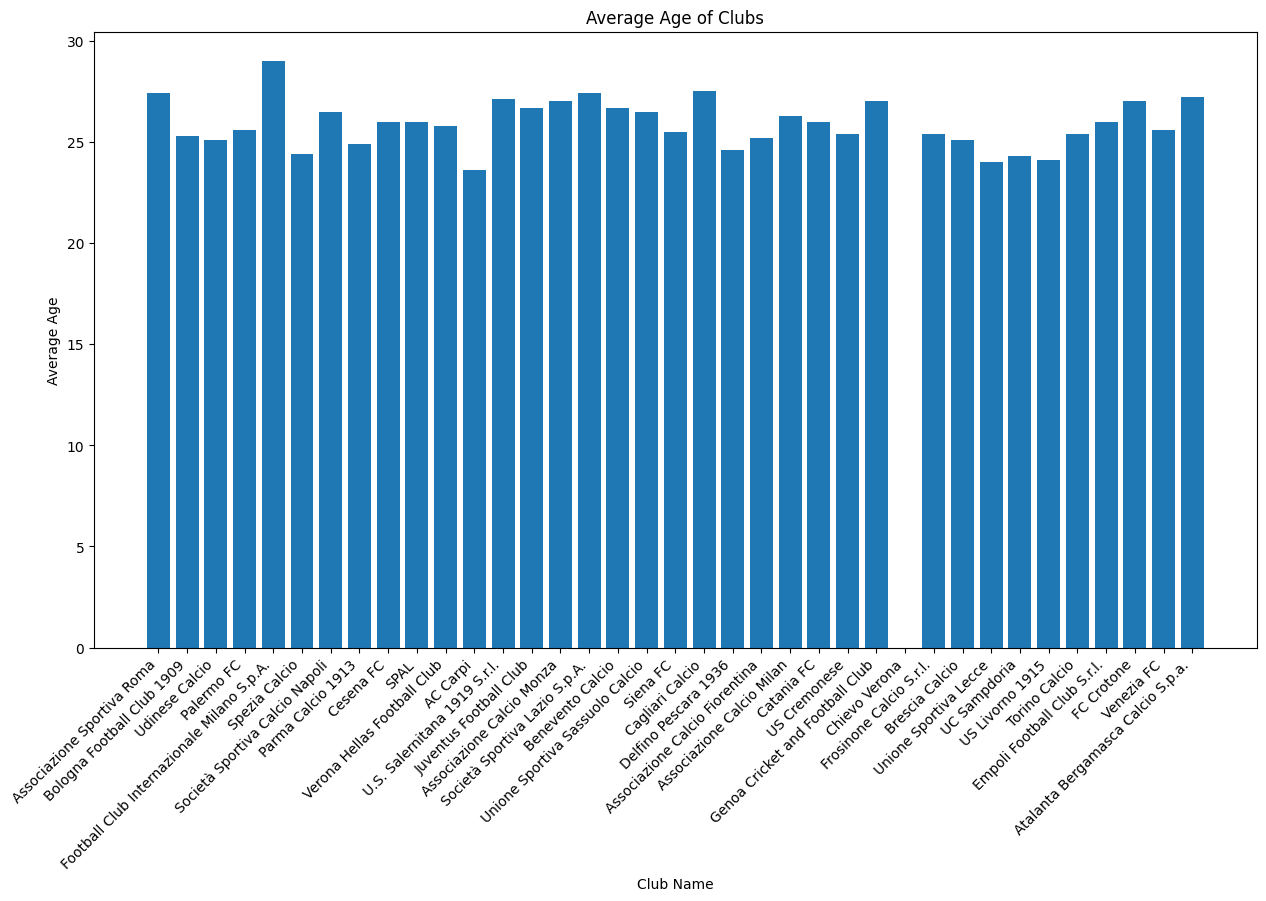

In [14]:
def plotBarChart(data):
    names = [item["name"] for item in data]
    average_ages = [item["average_age"] if item["average_age"] is not None else 0 for item in data]

    plt.figure(figsize=(15, 8))

    plt.bar(names, average_ages)
    plt.xlabel("Club Name")
    plt.ylabel("Average Age")
    plt.title("Average Age of Clubs")
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas del eje X para mayor legibilidad
    plt.show()

# Ejemplo de uso
plotBarChart(clubsInfo)
